In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

Concatenate Data for EDA

In [2]:
# Train
train = pd.read_csv("./twitter_training.csv", header=None)
train.rename(columns={0:'tweet_id', 1:'entity', 2:'sentiment', 3:'tweet'},inplace=True)
train = train.dropna().reset_index(drop=True)

# Val
val = pd.read_csv("./twitter_validation.csv", header=None)
val.rename(columns={0:'tweet_id', 1:'entity', 2:'sentiment', 3:'tweet'},inplace=True)
val_id = val['tweet_id']

df = pd.concat([train, val],axis=0).reset_index(drop=True)

### EDA on unique tweets
df = df.groupby("tweet_id").head(1).reset_index(drop=True)
df

,tweet_id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2402,Borderlands,Positive,So I spent a few hours making something for fu...
2,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM..."
3,2404,Borderlands,Positive,that was the first borderlands session in a lo...
4,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
...,...,...,...,...
12442,9196,Nvidia,Negative,Cheap doesn't mean better btw! . . techsall.co...
12443,9197,Nvidia,Neutral,Nvidia doesn’t want to give up its 2017 ‘crypt...
12444,9198,Nvidia,Negative,Nvidia really delayed the 3070 2 weeks .
12445,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...


# Sentiment Distribution among all tweets

- Most common Sentiment among all tweets?

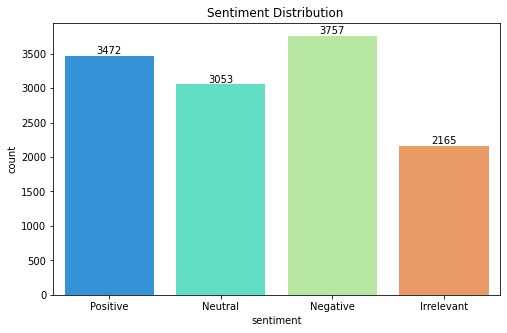

In [3]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='sentiment',data=df, palette='rainbow')
plt.title("Sentiment Distribution ")

for container in ax.containers:
    ax.bar_label(container)

Most tweets in this dataset are **Negative** followed closely **Positive**

# Entity Distribution among all tweets

- Which topic was most discussed?

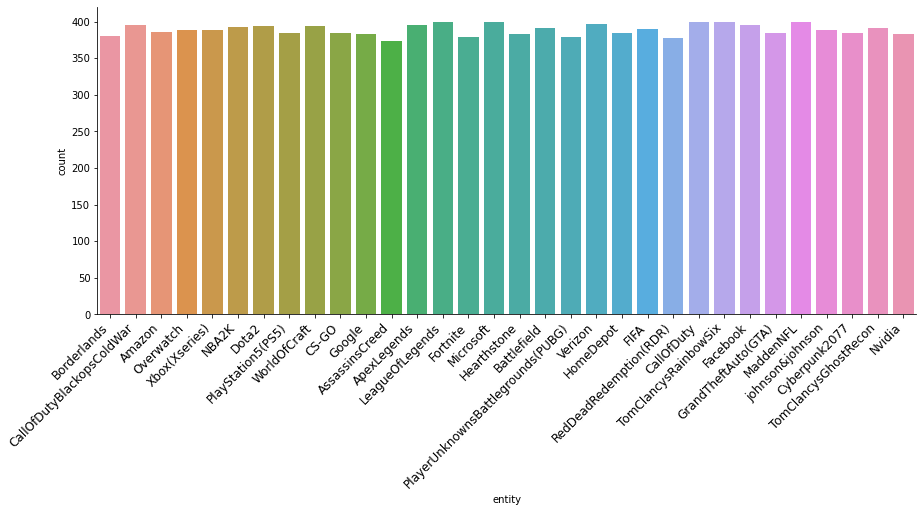

In [4]:
ax = sns.catplot(data=df, x="entity", kind="count", aspect=2.5)
a = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

### Top 10 Topics

In [5]:
topics = pd.DataFrame({'# of Tweets':df.entity.value_counts()}).head(10)
topics

,# of Tweets
TomClancysRainbowSix,400
MaddenNFL,400
Microsoft,400
LeagueOfLegends,399
CallOfDuty,399
Verizon,397
CallOfDutyBlackopsColdWar,396
ApexLegends,396
Facebook,395
WorldOfCraft,394


**Games** and **Social Media** are topics most discussed in this dataset

### Most common Tweet Sentiment  (Topic Wise)

In [6]:
most_common_sentiment = []
for i in topics.index:
    most_common_sentiment.append(df[df.entity==i]['sentiment'].value_counts().idxmax())

In [7]:
topics = pd.DataFrame({'# of Tweets':df.entity.value_counts().head(10), 'Most Common Sentiment': most_common_sentiment}).head(10)
topics = topics.reset_index().rename(columns={'index':'entity'}) 
topics

,entity,# of Tweets,Most Common Sentiment
0,TomClancysRainbowSix,400,Negative
1,MaddenNFL,400,Negative
2,Microsoft,400,Neutral
3,LeagueOfLegends,399,Neutral
4,CallOfDuty,399,Negative
5,Verizon,397,Negative
6,CallOfDutyBlackopsColdWar,396,Positive
7,ApexLegends,396,Neutral
8,Facebook,395,Neutral
9,WorldOfCraft,394,Neutral
